# TensorFlow

TensorFlow is one of the most popular deep learning frameworks available. It's used for everything from cutting-edge machine learning research to building new features for the hottest start-ups in Silicon Valley. In this course, learn how to install TensorFlow and use it to build a simple deep learning model. After gettting TensorFlow up and running, we will demonstrate how to create and train a machine learning model, as well as how to leverage visualization tools to analyze and improve your model. Finally, we will go over how to deploy models locally or in the cloud. When you wrap up this course, you'll be ready to start building and deploying your own models with TensorFlow.

### Learning Objectives:
- What's TensorFlow?
- Hardware, software, and language requirements
- Creating a TensorFlow model
- Training a deep learning model with TensorFlow
- Visualizing the computational graph
- Adding custom visualizations to TensorBoard
- Exporting models for use with Google Cloud

----------

## Introduction

TensorFlow is a software framework for building and deploying machine learning models. Machine learning is a different approach than traditional programming. 

With traditional programming, we write the program that tells the computer exactly what to do to complete the task. With machine learning, we don't explicitly tell the computer how to do something. 

### Machine Learning
Instead we show a training data and the machine learning algorithm uses the training data that come up with its own rules to complete the task. They are computer algorithms that have the ability to learn without being explicitly programmed.

## Why is it called TensorFlow?

TensorFlow is designed to work with large data sets made up of many different individual attributes. 

__Any data that you want to process with TensorFlow has to be stored in the multi-dimensional array called tensor.__ To run operations on the data set, you construct a computational graph similar to a flow chart that determines how data flows from one operation to the next. 

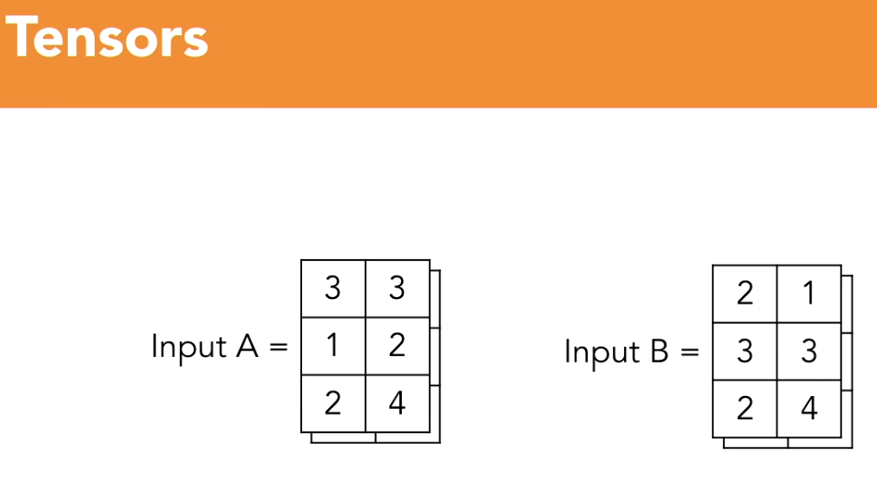

In [20]:
from PIL import Image
Image.open('Images/01-tensors.png')

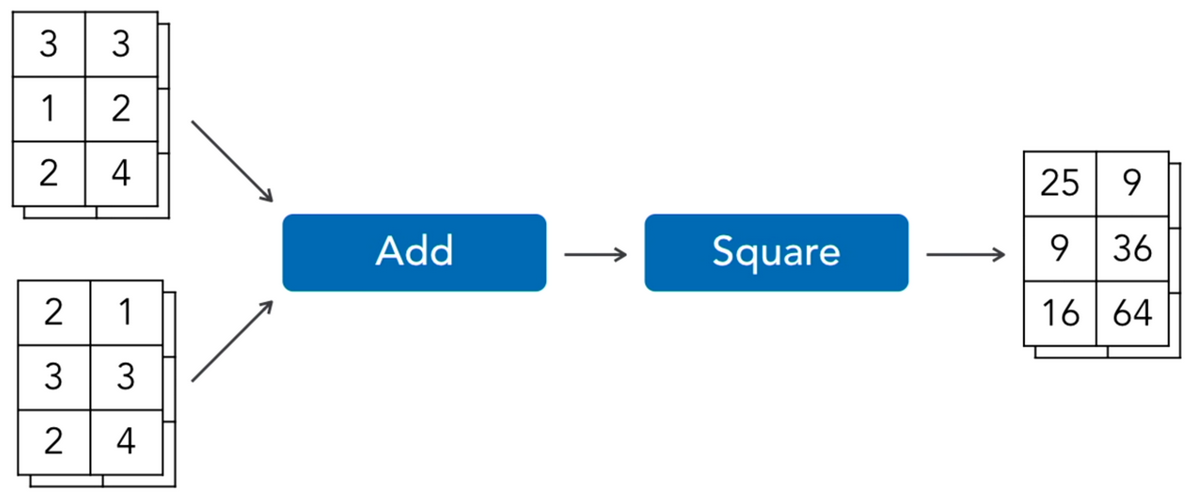

In [21]:
Image.open('Images/02-tensorflow.png')

So it's called TensorFlow because you're defining how data or tensors will flow through the system. Here, we are passing in two tensors, adding those numbers, squaring them and then outputting the result as another tensor. TensorFlow is designed to be very generic and open-ended. You can define the graph of operations that does any calculation that you want. While TensorFlow is most often used to build deep neural networks, it can be used to build nearly anything that involves processing data by running a series of mathematical operations.

## TensorFlow Requirements

### Development Phase

- When you are coding and training a neural network usually done on your own computer

### Runtime (Inference) Phase

- When you are making predictions on a trained neural network on a computer or a cloud server

When you are developing maching learning models with TensorFlow, you need a computer running Windows, macOS, or Linux. For a large project you might want to take advtange of multiple Linux computers in the cloud to speed up processing.

### Flexibility

You can run your trained models on Mac, Windows, and Linux desktops, as a web service on Linux servers using the TensorFlow Serving application, in the cloud with Google's Cloud ML service, and on iOS or Android mobile devices. The flexibility to run the same machine learning model on many different platforms is one of the best features of TensorFlow.

TensorFlow can take advantage of GPUs to speed up training. GPUs are chips originally designed to speed up 3D video games but they are also good at algebraic calculations needed to train neural networks.

In fact deep learning is only possible because GPUs let us train large neural networks in a reasonable amount of time. Keep in mind that TensorFlow only supports NVIDIA-brand GPUs.

### C++ & Python

Using a GPU with TensorFlow requires installing additional software libraries from NVIDIA that aren't open source. Just installing TensorFlow on its own won't be enough to take advantage of a GPU. TensorFlow's core execution engine is written in C++ for speed. But C++ can be a cumbersome language to work with. 

To make things easier TensorFlow lets other programming languages control the C++ core. The best supported language for TensorFlow development is Python. Python is a high level programming language that is easy to learn and quick to develop in. 

The main downside of using Python is that it is relatively slow to execute compared to a low level language like C or C++. But TensorFlow works around this problem. Your Python code defines the structure of your machine learning model but TensorFlow's high performance execution engine actually pushes data through the model and performs all the mathematical operations using C++.

---------------

## Supervised Learning

Supervised machine learning is the branch of machine learning where we train the model by showing it input data and the expected result for that data. And it works out how to transform the input into the output. When building and using a supervised machine learning model, there's a process we always follow called the model of train, test, evaluation flow.

1. Choose machine learning algorithm we want to build our model (Neural Networks)


2. Train the algorithm by showing it training data and the expected output for the data and it has to figure out how to come up with the expected result
    - The algorithm learns hwo to transform the input to produce the correct output
    
    
3. After we train the model, load up a second set of data it has never seen before called the testing data set. This is the testing phase. Feed in the testing data through the model and make sure it is able to predict the correct result..
    - This shows that the model actually learned how to solve the problem in the general way and didn't just memorize the answers for the training data
    
    
4. Once the model is trained and tested we can use it. This is the evaluation phase. Pass in new data and it will tell us the answer it calculated. 

In TensorFlow, we have to set up the mechanics of this ourselves.
1. Code the machine learning algorithm by building a computational graph of operations that TensorFlow can run
    - Neural Network Implementation
        - Define each layer of the neural network and connect them together so that data flows from the first layer through to the last layer.
        - Add the palceholder node that represents the dat that will be fed in as input to the neural network
        - Add another placeholder node that represents the output, or values predicted by the neural network
        - Measure the neural network's accuracy by defining a function that measures the accuracy of each prediction during the training phase called a __loss function__
            - Loss function gets added to the graph as its own operation
        - Create an optimizer function that tells TensorFlow how we want to train the model
            - Run this function to perform one training step on our model
        - The training operation will train the neural network by looking at the results of the loss function and using that to adjust the weights of each layer in the neural network until they produce the desired output

## 1. Create a TensorFlow Session For Training Monitoring

Create a TensorFlow session. A session is an object in TensorFlow that runs operations on the graph and tracks the state of each node in the graph. Once the session object is created, we can ask it to run any operation in the graph. 

To train the model, we'll call the training operation over and over. Each time the training operation runs, we'll pass a new training data that will be used for that training pass. And then we'll check the current accuracy by calling the loss function. 

### TensorBoard
While the training process is running, we can watch the results graphically using a separate tool called __TensorBoard__. TensorBoard is a web based application that lets us visually monitor the system in real time. We can use the graphs in TensorBoard to monitor how the accuracy is improving as the training process continues to run.

## 2. Testing Phase

We pass in test data, and then measure the accuracy by calling the loss function. The data will flow through the neural network and into the loss function. 

The loss function will tell us how close the values predicted by the neural network were to the real testing data. Once we are happy with the accuracy of the predictions, we can save this model to a file.

## 3. Saving a Model

When we save a trained model, we're actually writing out a copy of this graph, and the state of all nodes in the graph. When we load the model later, we're just restoring the graph to it's previous state. Now that we have a trained model, we'll load it up to restore the graph. 

## 4. Predictions

To use the model to make new predictions, we'll feed in data to the input node and call the output operation. The data will flow through the neural network to the output node. As you can see, the different nodes of the computational graph are used for different phases of the train test evaluation flow. In fact, when we are in the evaluation phase, and only using the graph to make new predictions, the loss function and the training operation are no longer needed at all. 

### Deployment
To make new predictions, all we need are the nodes that make up the neural network itself. So when we deploy a trained neural network to the cloud or to a mobile device, we can strip out all the other parts of the computational graph and only include the parts we need to make predictions.

-------------------------------------

In [22]:
# Confirm TensorFlow sees the GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Confirm Keras sees the GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

# print(device_lib.list_local_devices())

## Build a Basic TensorFlow Model

### 1. Build a TensorFlow Computational Graph

This graph has two inputs, X and Y. Those are the two numbers we want to add together. This graph also has one operation called 'addition'. That note simply adds together the tensors passed into it. Once this graph is defined, we can use it by creating a new TensorFlow session.

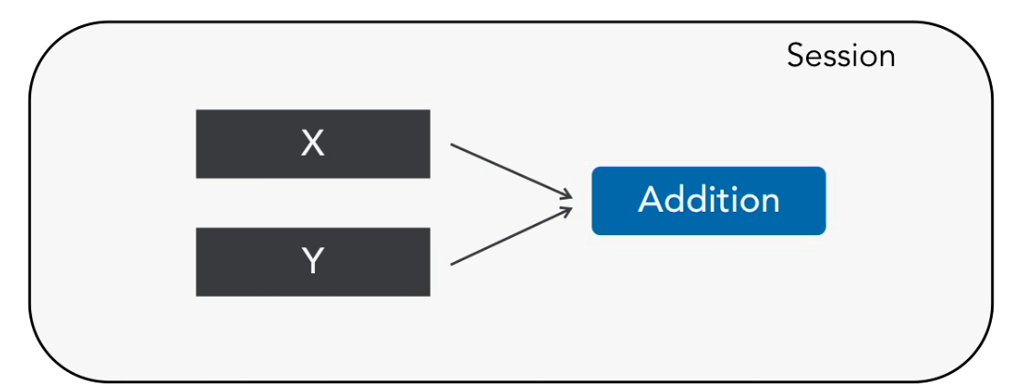

In [23]:
Image.open('Images/03-computational-graph.png')

Then we'll feed in values for X and Y, and we'll ask the session object to execute the addition node. The result we get back from executing the addition node will be the answer. 

In [25]:
import os
import tensorflow as tf

# Turn off TensorFlow warning messages in program output
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

'''
  Next, let's define the X and Y input nodes. When you create a node in TensorFlow, you have 
  to choose what kind of node to create. The X and Y nodes will be placeholder nodes that get 
  assigned a new value every time we make a calculation, so we'll create them as a TF.placeholder node.
'''

# Define the computational graph
X = tf.placeholder(tf.float32, name='X') # input nodes
Y = tf.placeholder(tf.float32, name='Y') # input nodes

'''
  Define the node that does the addition operation
'''

# Define addition node
addition = tf.add(X, Y, name='addition') # pass in X & Y values

'''
  To execute operations in the graph, we have to create a session and pass on the operation
  we want to run (addition).
  
  When addition operation runs, it's going to grab the values of the X and Y nodes so
  we also need to feed in values for X and Y.
  
  Add feed_dict() parameter with values for X and Y.
  
  TensorFlow always works with tensors, which are multi-dimensional arrays.
'''

# Create a new TensorFlow session to run operation and add X & Y values
with tf.Session() as session:
    result = session.run(addition, feed_dict={X: [100, 200, 300], Y: [100, 200, 300]})
    print(result)

[200. 400. 600.]


TensorFlow's real value is when we are working with large data sets and computationally intensive operations. It can take the same operational graph we've defined here, and execute it across multiple machines who are using graphics cards with GPUs to accelerate processing. The same code in TensorFlow can scale from running on a low power device like a cell phone, all the way up to running on multiple servers in a massive data center.

-----------